# NBA's 3 Point Shooting Trend

Anyone who have been watching NBA games would have noticed that the league has started shooting more threes. The top winning teams are also the best 3-point shooting teams. Do 3-point shootings actually lead to winning in the NBA? 

In this project, I: 
(1) explore possible correlations between 3-point shooting and the winning, and 
(2) predict the 2016-2017 season results of each team, based on the correlations. 

The data used in this project are obtained from http://www.basketball-reference.com/

Datasets: 6 NBA regular season team stats (2011-2017), including the current season (as of March 02 2017).
I cleaned the raw data and created the following csv files:
(1) All-stat.csv
row: the stats for each team in the season. We have 30 games and 6 seasons so there are 30*6 = 180 rows
column: [0] 3 made per game, [1] 3 attempt per game, [2] 3%, [3] 2/3 made ratio, [4] 2/3 attempt ratio, [5] eFG%* for each season
* eFG%: Effective Field Goal Percentage. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal

(2) All-win-perc.csv
The winning percentage for each team in the season. Each row corresponds to the team stats in All-stat.csv.

In [15]:
# Let's take a look of the data
import numpy as np
import pandas as pd
ind_1 = np.genfromtxt("All-stat.csv",delimiter=" ") # 3 made pg, att pg, %, 2/3 made ratio, 2/3 att ratio, eFG
win_perc = np.genfromtxt("All-win-perc.csv",delimiter=" ") # winning percentage

In [14]:
print(ind_1[0]) # the stats of first team (Atlanta Hawks) in 2011-2012 season
# below shows: in 2011-2012 season Atlanta Hawks had 7.45 3 pointer made per game, 20.15 3 pointer attempt per game
# 3 point percentage of 0.37%, 2 point and 3 point made ratio per game and so on.

print(win_perc[0]) # the winning percentage of Atlanta Hawks in in 2011-2012 season

[  7.4545  20.1515   0.37     0.2026   0.2487   0.5   ]
0.606


In [12]:
# convert to pandas dataframe
df_allstat = pd.DataFrame(ind_1)
df_win_perc = pd.DataFrame(win_perc)
df_allstat.columns = ['3 made pg','3 att pg','3%','2/3 made ratio','2/3 att ratio','eFG%']

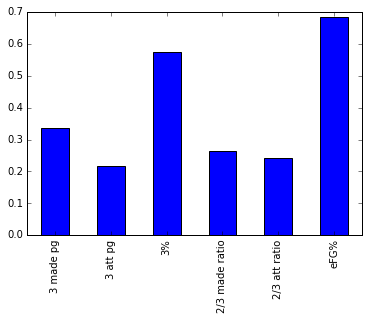

In [13]:
# examine the correlations for each indicator with winning
%matplotlib inline
df_allstat.corrwith(df_win_perc[0]).plot.bar()

Looks like 3 made per game, 3 shooting percentage, and eFG% are better indicators for winning. 3 point attempt is not a good indicator.

We all know that winning is not only related to offensive indicators but also with defense. Here I added two more columns in the data, which related to defensive factors, along with the best 3 indicators above.

In [17]:
ind_2 = np.genfromtxt("All-stat-opp-eFG.csv",delimiter=" ") # add two more columns: 1- opp 3%, 1- opp eFG%
df_allstat_opp = pd.DataFrame(ind_2)
df_allstat_opp.columns = ['3 made pg','3%','eFG%','1- opp 3%','1- opp eFG%']

1- opp 3%: opponent's 3 point % per game, 1- opp eFG%: opponent's eFG% per game; I use 1- these two indicators to make them become positive correlation with winning.

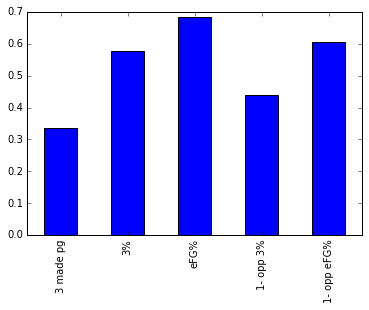

In [18]:
# examine the correlations for each indicator with winning
%matplotlib inline
df_allstat_opp.corrwith(df_win_perc[0]).plot.bar()

Here are the five best 3 point shooting indicators for winning. This probably means that to be able to win the game, you need to have good 3 pointer percentage, a good amount of 3 made per game, as well as restrain oppoenent's 3 point shooting.

Next, I use the combination of these indicators as input in neural network to predict the winning percentage (output). I set up a multiple layer perception and applied Python Scikin-learn 0.18 and MLPRegressor to fit the data.

# (1) inputs: 3PM, 3P%, 2/3 M ratio, eFG% in 2011-2017

In [19]:
X = np.genfromtxt("All-stat-noatt.csv",delimiter=" ") # data: # 3 made pg, percentage, ratio made, eFG%
y = np.genfromtxt("All-win-perc.csv",delimiter=" ") # target
# Split the data into trainning sets and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
# normalize and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
# apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.neural_network import MLPRegressor #(1)
mlp = MLPRegressor(hidden_layer_sizes=(3,3,3),max_iter=200,solver='lbfgs') #(2)
mlp.fit(X_train,y_train) #(3)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [40]:
predictions = mlp.predict(X_test)

In [41]:
mlp.score(X_test, y_test, sample_weight=None) # 

0.44819503423785423

In [42]:
# Sort the data according to winning percentage, better for visualization
ind = y_test.argsort()
y_test_sort = y_test[ind]
predictions_sort = predictions[ind]

//anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


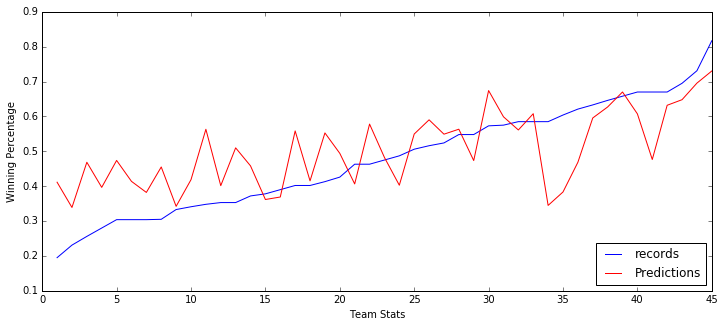

In [44]:
example = []
for i in range(45):
    example.append(i+1)
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.gca().set_color_cycle(['blue','red'])
plt.plot(example, y_test_sort)
plt.plot(example, predictions_sort)
plt.ylabel('Winning Percentage')
plt.xlabel('Team Stats')
plt.legend(['records', 'Predictions'], loc='lower right')
plt.show()

It seems like that the combination of these indicators obtained the merit score of R^2: 0.45

Let's try different combination of 3 point shooting indicators to see if we can fit the data better.

# (2) inputs: 3PM, 3P%, eFG%, 1-opp 3P% in 2011-2017

In [157]:
X = np.genfromtxt("All-stat-opp.csv",delimiter=" ") # data: # 3 made pg, percentage, eFG%, 1- opp 3%
y = np.genfromtxt("All-win-perc.csv",delimiter=" ") # target
# Split the data into trainning sets and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# normalize and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
# apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [158]:
from sklearn.neural_network import MLPRegressor #(1)
mlp = MLPRegressor(hidden_layer_sizes=(3,4,3),max_iter=200,solver='lbfgs') #(2)
mlp.fit(X_train,y_train) #(3)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 4, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [159]:
predictions = mlp.predict(X_test)

In [160]:
mlp.score(X_test, y_test, sample_weight=None)

0.61527170602588077

//anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


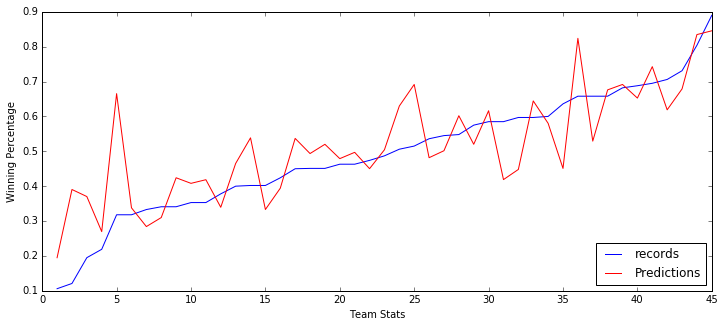

In [161]:
ind = y_test.argsort()
y_test_sort = y_test[ind]
predictions_sort = predictions[ind]

example = []
for i in range(45):
    example.append(i+1)
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.gca().set_color_cycle(['blue','red'])
plt.plot(example, y_test_sort)
plt.plot(example, predictions_sort)
plt.ylabel('Winning Percentage')
plt.xlabel('Team Stats')
plt.legend(['records', 'Predictions'], loc='lower right')
plt.show()

Adding defensive indicator (opp 3%) did increase the merit score of R^2: 0.61

Let's cut out the data of 2011-2014 to see if the winning is more correlated with 3 point shooting recently. Here I also add one more defensive indicator, opp eFG%.

# (3) inputs: 3PM, 3P%, eFG%, 1-opp 3P%, 1-eFG% in 2014-2017

In [239]:
X = np.genfromtxt("All-stat-opp-eFG-cut.csv",delimiter=" ") # data: # 3 made pg, percentage, eFG%, 1- opp 3%
y = np.genfromtxt("All-win-perc-cut.csv",delimiter=" ") # target
# Split the data into trainning sets and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# normalize and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
# apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [240]:
from sklearn.neural_network import MLPRegressor #(1)
mlp = MLPRegressor(hidden_layer_sizes=(3,4,3),max_iter=200,solver='lbfgs') #(2)
mlp.fit(X_train,y_train) #(3)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 4, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [241]:
predictions = mlp.predict(X_test)

In [242]:
mlp.score(X_test, y_test, sample_weight=None)

0.75945358631845261

//anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


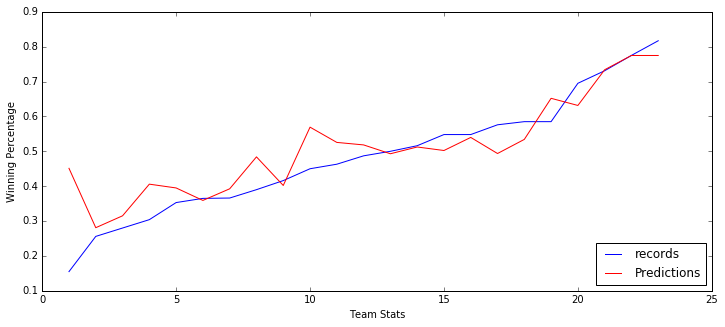

In [243]:
ind = y_test.argsort()
y_test_sort = y_test[ind]
predictions_sort = predictions[ind]

example = []
for i in range(23):
    example.append(i+1)
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.gca().set_color_cycle(['blue','red'])
plt.plot(example, y_test_sort)
plt.plot(example, predictions_sort)
plt.ylabel('Winning Percentage')
plt.xlabel('Team Stats')
plt.legend(['records', 'Predictions'], loc='lower right')
plt.show()

With two defensive indicators, the merit score of R^2 increased to 0.76, which may be the best we can get here. 

# Predictions

Based on the indicators (3PM, 3P%, eFG%, 1-opp 3P%, 1-eFG%) of played games in 2016-2017 season, I used trained algorithm to predict final 2017 results (Win, Lose, Win%)

In [244]:
Target = np.genfromtxt("2017-03-02.csv",delimiter=" ") # target

In [248]:
Target = scaler.transform(Target)
prediction_target = mlp.predict(Target)
np.savetxt("prediction_teams_2017.csv", prediction_target, delimiter="  ", fmt='%.3E')

# Summary

3 point shooting is related to winning in the NBA. Five best 3 point shooting indicators were used to predict winning percentage and 2016-2017 final results.

Five best 3 point shooting indicators: (1) 3 pointer made per game, (2) 3 pointer percentage, (3) effective field goal percentage, (4) opponent's 3 pointer %, and (5) opponent's effective field goal percentage. 

# Future Works

Dig into game by game statistics. Include recent trades and impact of injuries.
